Consultar:

[How to Split a Dataset Into Training and Testing Sets with Python](https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830)

[Python | Linear Regression using sklearn](https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/)



In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
wine_df = pd.read_csv("wine/winequality-white.csv", delimiter=";")

In [55]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<Axes: >

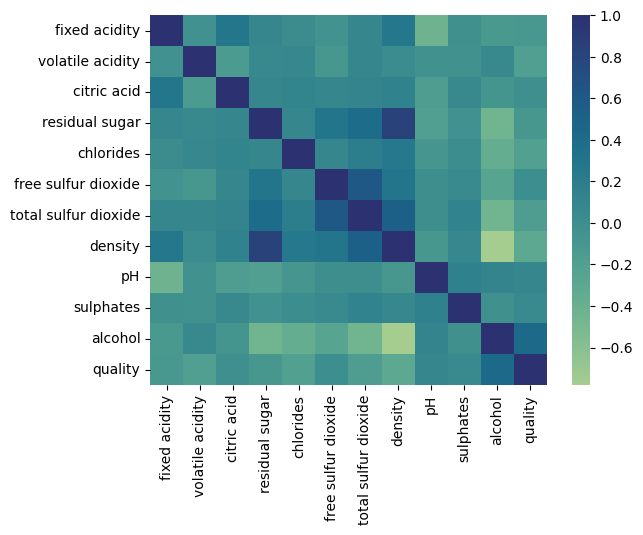

In [56]:
sns.heatmap(wine_df.corr(), cmap="crest")

### For all features

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
model_regression = LinearRegression()

In [59]:
X_train = np.array(wine_df).reshape(-1, 1)
y_train = np.array(wine_df).reshape(-1, 1)

In [60]:
(train_data, test_data, train_labels, test_labels) = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=42)

In [61]:
reg = model_regression.fit(train_data, train_labels)

Mean Squared Error: 1.9018458272584493e-14
Mean Absolute Error: 1.018626566638112e-14


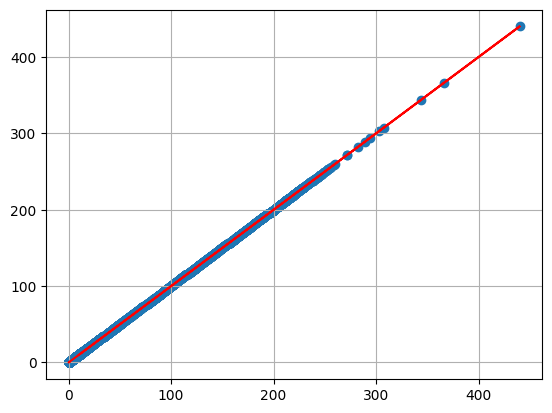

In [62]:
y_predicted = model_regression.predict(train_data)
plt.scatter(train_data[:,0], train_labels)
plt.plot(np.array(train_data[:,0]), y_predicted, c='r')
plt.grid()

mean_squared_error_val = np.sqrt(mean_squared_error(train_labels, y_predicted))
mean_absolute_error_val = mean_absolute_error(train_labels, y_predicted)
print("Mean Squared Error: {}".format(mean_squared_error_val))
print("Mean Absolute Error: {}".format(mean_absolute_error_val))

Mean Squared Error: 1.9328893114929848e-14
Mean Absolute Error: 1.0323476932101403e-14


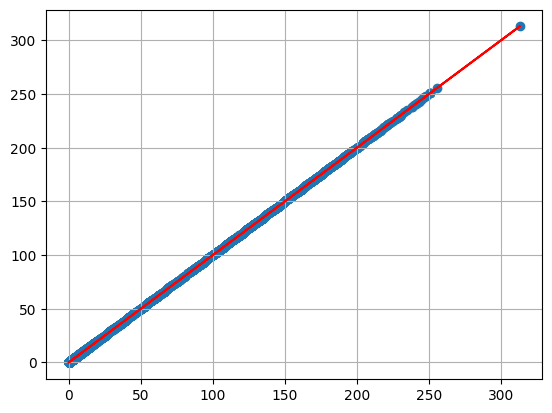

In [63]:
y_pred_test = model_regression.predict(test_data)
plt.scatter(test_data[:,0], test_labels)
plt.plot(np.array(test_data[:,0]), y_pred_test, c='r')
plt.grid()

mean_squared_error_val = np.sqrt(mean_squared_error(test_labels, y_pred_test))
mean_absolute_error_val = mean_absolute_error(test_labels, y_pred_test)
print("Mean Squared Error: {}".format(mean_squared_error_val))
print("Mean Absolute Error: {}".format(mean_absolute_error_val))


### Density x Residual Sugar

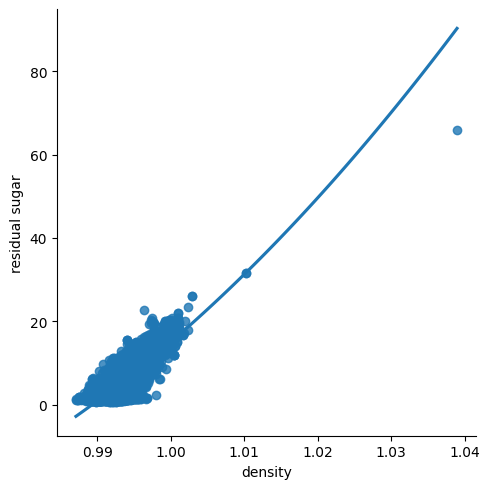

In [64]:
sns.lmplot(x='density', y='residual sugar', data=wine_df, order=2, ci=None)
plt.show()

In [65]:
model_regression = LinearRegression()

In [66]:
X_train = np.array(wine_df["density"]).reshape(-1, 1)
y_train = np.array(wine_df["residual sugar"]).reshape(-1, 1)

In [67]:
(train_data, test_data, train_labels, test_labels) = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=42)

In [68]:
reg = model_regression.fit(train_data, train_labels)

In [69]:
reg.score(train_data, train_labels)

0.7107412586786006

In [70]:
reg.coef_

array([[1433.87349326]])

In [71]:
reg.intercept_

array([-1418.92084746])

Mean Squared Error: 2.7637113519416867
Mean Absolute error: 2.224465932966296


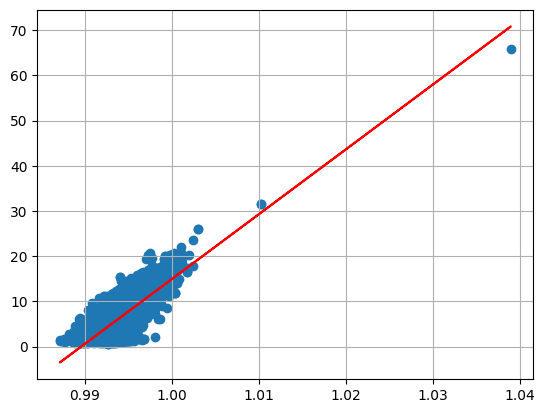

In [72]:
y_predicted = model_regression.predict(train_data)
plt.scatter(train_data[:,0], train_labels)
plt.plot(np.array(train_data[:,0]), y_predicted, c='r')
plt.grid()

mean_squared_error_val = np.sqrt(mean_squared_error(train_labels, y_predicted))
mean_absolute_error_val = mean_absolute_error(train_labels, y_predicted)
print("Mean Squared Error: {}".format(mean_squared_error_val))
print("Mean Absolute error: {}".format(mean_absolute_error_val) )

Mean Squared Error: 2.7453568435278495
Mean Absolute error: 2.19460795588206


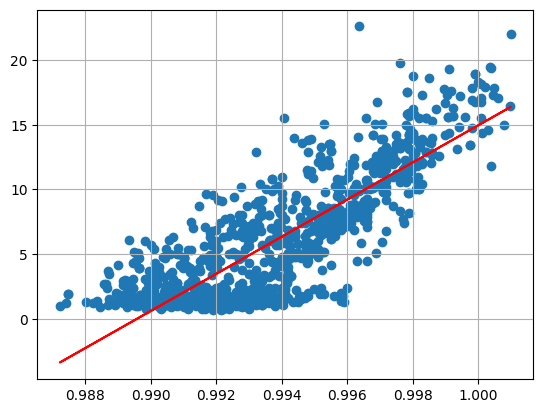

In [73]:
y_pred_test = model_regression.predict(test_data)
plt.scatter(test_data, test_labels,)
plt.plot(test_data, y_pred_test, color='r')
plt.grid()

mean_squared_error_val = np.sqrt(mean_squared_error(test_labels, y_pred_test))
mean_absolute_error_val = mean_absolute_error(test_labels, y_pred_test)
print("Mean Squared Error: {}".format(mean_squared_error_val))
print("Mean Absolute error: {}".format(mean_absolute_error_val) )